In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

In [2]:
df=pd.read_csv('Practical Exam Datasets/K-Means & Hirarchical Clustering/Hitters.csv')

In [3]:
df.shape

(322, 20)

In [4]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [5]:
null_col=['Salary']

In [6]:
null_imputer=SimpleImputer(strategy="mean")

In [7]:
df['Salary']=null_imputer.fit_transform(df[null_col])

In [8]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [9]:
xx=df[['CRuns']]

In [10]:
sc=StandardScaler()
x=sc.fit_transform(xx)

In [13]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,535.925882,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500000,N


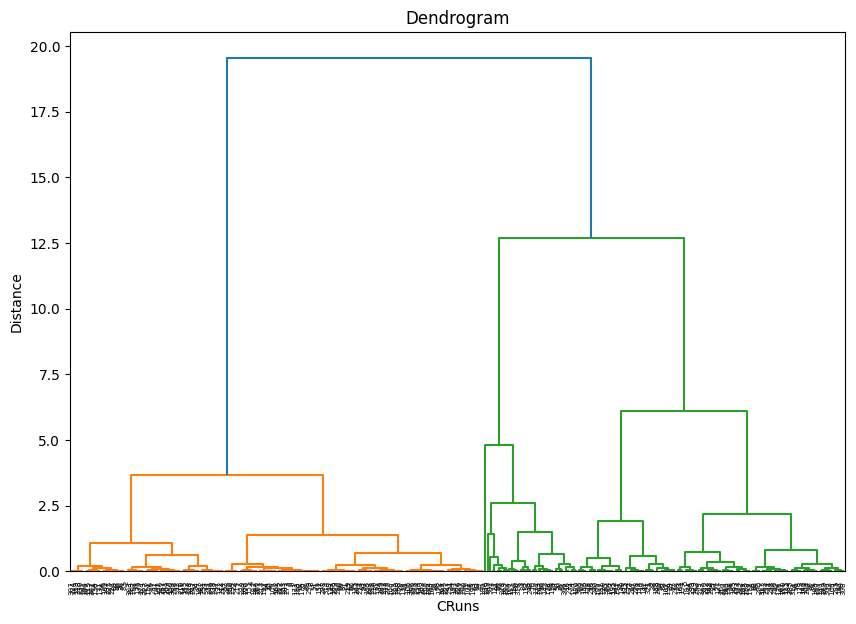

In [14]:
plt.figure(figsize=(10,7))
dendro=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('CRuns')
plt.ylabel('Distance')
plt.show()

In [17]:
model=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
pred=model.fit_predict(x)

C:\Users\madha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [18]:
pred

array([1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1,
       1, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 0, 2, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1,
       2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1,
       1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0,

In [19]:
df['Clusters']=pred

In [21]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Clusters
0,293,66,1,30,29,14,1,293,66,1,...,29,14,A,E,446,33,20,535.925882,A,1
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,N,W,632,43,10,475.000000,N,0
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,A,W,880,82,14,480.000000,A,1
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,N,E,200,11,3,500.000000,N,2
4,321,87,10,39,42,30,2,396,101,12,...,46,33,N,E,805,40,4,91.500000,N,1


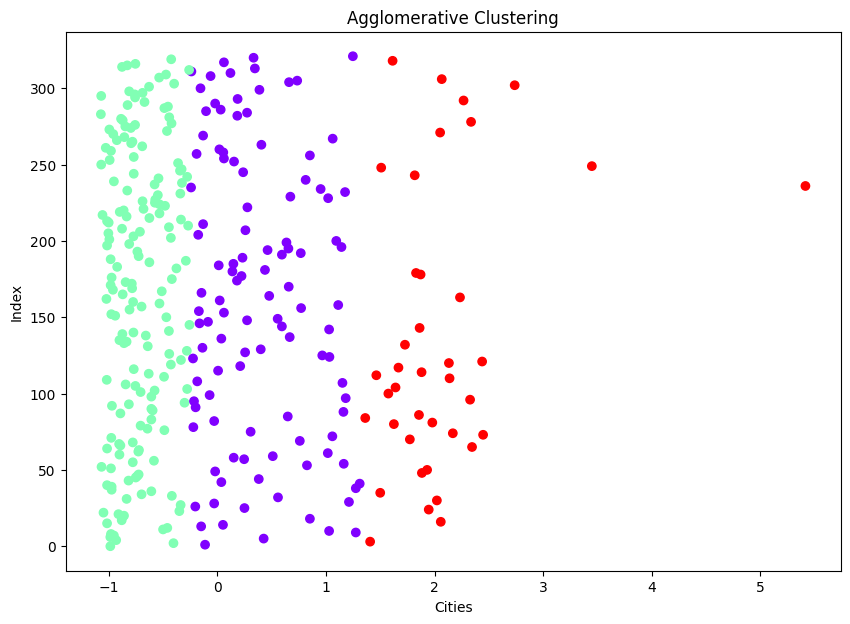

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(x,xx.index,c=df['Clusters'],cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('Cities')
plt.ylabel('Index')
plt.show()